model with intercept: y=0.0735x+8.3257
model without intercept: y=0.0950x


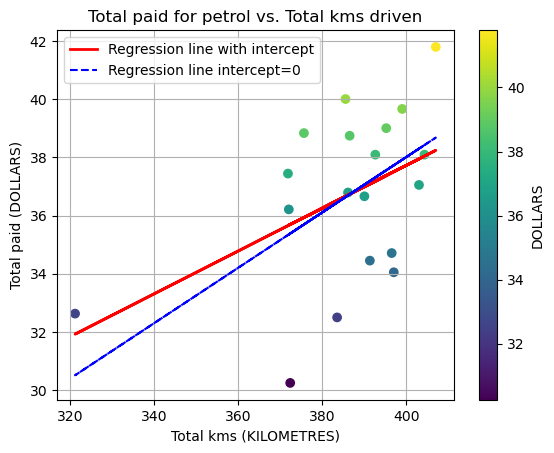

estimate cost with intercept: $118.57
estimate cost without intercept: $142.54


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# create raw data
data = {
    'DOLLARS': [36.66, 37.05, 34.71, 32.5, 32.63, 34.45, 36.79, 37.44, 38.09, 38.09, 38.74, 39, 40, 36.21, 34.05, 41.79, 30.25, 38.83, 39.66],
    'KILOMETRES': [390, 403, 396.5, 383.5, 321.1, 391.3, 386.1, 371.8, 404.3, 392.6, 386.49, 395.2, 385.5, 372, 397, 407, 372.33, 375.6, 399]
}
df = pd.DataFrame(data)

 # x is independent variable and y is dependent
x = df[['KILOMETRES']].values
y = df['DOLLARS'].values

# plot the scatter plot
plt.scatter(x, y, c=y, cmap='viridis')
plt.colorbar(label='DOLLARS')
plt.title('Total paid for petrol vs. Total kms driven')
plt.xlabel("Total kms (KILOMETRES)")
plt.ylabel("Total paid (DOLLARS)")
plt.grid(True)

# training the model with intercept
model = LinearRegression()
model.fit(x,y)
intercept=model.intercept_
slope=model.coef_[0]
print(f"model with intercept: y={slope:.4f}x+{intercept:.4f}")



# plot the regression line with bias
y_pred = model.predict(x)
plt.plot(x, y_pred,color='red',linewidth=2,label='Regression line with intercept')
      

# training the other model without intercept
model2= LinearRegression(fit_intercept=False)
model2.fit(x,y)
slope2=model2.coef_[0]
print(f"model without intercept: y={slope2:.4f}x")
# plot the regression line without bias
y_pred2= model2.predict(x)
plt.plot(x,y_pred2, color='blue', linestyle='--',label='Regression line intercept=0')
# show legend and display plot
plt.legend()
plt.show()

# Estimate petrol cost for a 1,500 km trip using both models 
d= 1500 
cost_with_intercept = slope * d + intercept
cost_without_intercept = slope2 * d
print(f"estimate cost with intercept: ${cost_with_intercept:.2f}")
print(f"estimate cost without intercept: ${cost_without_intercept:.2f}")


count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64


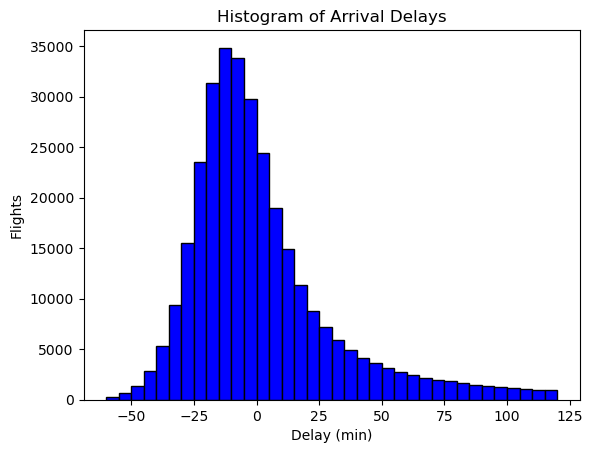

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


# read csv into a DataFrame
df = pd.read_csv("flightdata.csv")


# filter the records where arrival delay is between -60 and 120 mins
df = df[df["arr_delay"].between(-60, 120)]


# print summary statistics of the "arr_delay" column only
print(df["arr_delay"].describe())


# extract the "arr_delay" values as a numpy array (this excludes the column name)
sample = df.arr_delay.values


# get bin width of 5 mins
max_val = sample.max()
min_val = sample.min()
the_range = max_val - min_val
bin_width = 5
bin_count= int(the_range/bin_width)

# plot histogram of flight delay time distribution
plt.hist(sample, color='blue', edgecolor='black', bins=bin_count)
plt.title("Histogram of Arrival Delays")
plt.xlabel("Delay (min)")
plt.ylabel("Flights")
plt.show()